
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 31, 31, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                

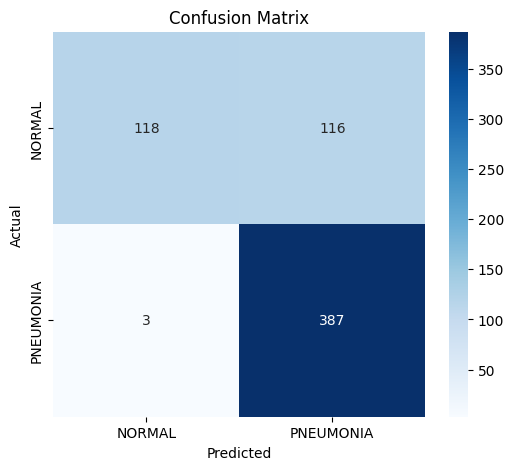

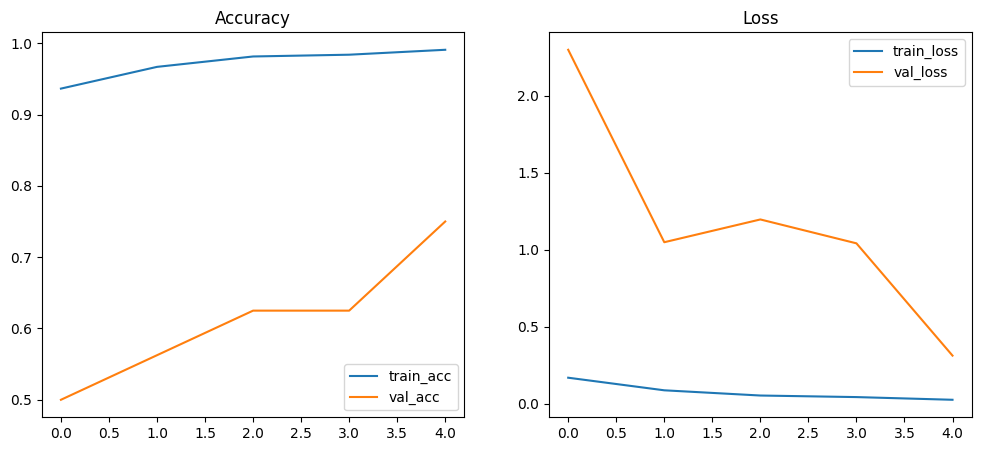

In [ ]:
# Chest X-ray CNN (Normal / Pneumonia) 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Directories

train_dir = r"D:\final_project\data\chest_xray\chest_xray\train"
val_dir   = r"D:\final_project\data\chest_xray\chest_xray\val"
test_dir  = r"D:\final_project\data\chest_xray\chest_xray\test"


# Hyperparameters (Fast Debug)

img_size = (64,64)      # small size for fast CPU training
batch_size = 16
epochs = 5              # quick run for testing


# Image Data Generators

train_datagen = ImageDataGenerator(rescale=1./255) 
val_datagen   = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size,
    class_mode='binary', shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size,
    class_mode='binary', shuffle=False
)


# CNN Model

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1],3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


# Train the Model

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)


# Evaluate on Test Set

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=1,
    class_mode='binary', shuffle=False
)

pred_prob = model.predict(test_gen)
pred = (pred_prob > 0.5).astype(int)
true_labels = test_gen.classes

# Classification Report
print(classification_report(true_labels, pred, target_names=list(test_gen.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_gen.class_indices.keys(),
            yticklabels=test_gen.class_indices.keys(), cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Plot Accuracy and Loss

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()



In [ ]:
# Save trained CNN model
model.save("D:/final_project/models/pneumonia_cnn_final.h5")
print("CNN Model Saved Successfully!")


CNN Model Saved Successfully!


d:\final_project\venv310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
